<center>
    
## <font color='maroon'>ASTR 21100/31200</font>
## <font color='maroon'>Computational techniques in astrophysics<br></font>
</center>

### Instructor: 
Andrey Kravtsov (email: <tt>kravtsov@uchicago.edu</tt>)
Professor,<br> Department of Astronomy & Astrophysics


### Teaching Assistants (for undergraduate students):  

Nathalie Chicoine (<tt>nchicoine@uchicago.edu</tt>), Diego Garza (<tt>diego2500garza@uchicago.edu</tt>), Alexandra Masegian (<tt>amasegian@uchicago.edu</tt>), Yue Pan (<tt>explorerpan@uchicago.edu</tt>), Aster Taylor (<tt>astertaylor@uchicago.edu</tt>)


<center>
    
## <font color='darkblue'>As an intro to computational methods and numerical experiments we will consider 
    
### <font color='darkblue'>Numerical integration of orbits of particles interacting gravitationally 
<p>
<center>
<img width=500 src="https://upload.wikimedia.org/wikipedia/commons/a/aa/Astronomical_unit.png"></img>

<center>
    
## <font color='darkblue'>The solar system including some of the dwarf planets
<p>
<center>
<img width=1000 src="https://i.pinimg.com/originals/00/6e/48/006e486c368ec03d318cdc1676cf7f29.jpg"></img>

### <font color='darkblue'>Numerical "integration" of motion of planets in the Gliese 876 exoplanet system 

Our goal for this week and for the 1st homework assignment is for you to learn the basics of how orbits are computed numerically and reproduce some cool motions of planets in an [exoplanet system Gliese 876](https://planet.fandom.com/wiki/Gliese_876) and results and figures of a paper by [Laughlin et al. 2005](https://ui.adsabs.harvard.edu/abs/2005ApJ...622.1182L/abstract). 
    
    
<p>
<center>
<img width=700 src="https://vignette.wikia.nocookie.net/planetpedia/images/9/9a/Gliese_876_b.jpg/revision/latest/scale-to-width-down/2000?cb=20110512032028"></img>

In [140]:
import numpy as np 

# use jupyter "magic" command to tell it to embed plot into the notebook 
import matplotlib.pyplot as plt
%matplotlib inline

### <font color='darkblue'>Equations governing motion of particles interacting gravitationally
        
Consider 2 particles interacting gravitationally. 
    
The first particle has "Cartesian" coordinates $x_1$, $y_1$, $z_1$ and velocity components $v_{x,1}$, $v_{y,1}$, $v_{z,1}$.     
    
Particle coordinates change as long as these velocity components are not zero; the rate of change is given by the definition of velocity:  
        
$$\frac{dx_1}{dt} = v_{x,1};\ \ \ \ \ \frac{dy_1}{dt} = v_{y,1};\ \ \ \ \  \frac{dz_1}{dt} = v_{z,1}.$$

This particle experiences gravitational force from the second particle, which changes its velocity components:  
    
$$\frac{dv_{x,1}}{dt}=a_{x,1};\ \ \ \ \frac{dv_{y,1}}{dt}=a_{y,1};\ \ \ \ \frac{dv_{z,1}}{dt}=a_{z,1},$$
    
where $a_{x,1}$, $a_{y,1}$, $a_{z,1}$ are components of the gravitational acceleration.
    

$$\vec{a}_1 = -G\,\frac{m_2}{r^3_{12}}\,\vec{r}_{21},$$

or 
$$a_{x,1}=-G\,\frac{m_2}{r^3_{12}}\,(x_{2}-x_{1}),$$

$$a_{y,1}=-G\,\frac{m_2}{r^3_{12}}\,(y_{2}-y_{1}),$$

$$a_{z,1}=-G\,\frac{m_2}{r^3_{12}}\,(z_{2}-z_{1}),$$
    
and where $r_{12}$ is the distance between the two particles: 
    
$$r_{12}=\left[(x_1-x_2)^2 + (y_1-y_2)^2 +(z_1-z_2)^2 \right]^{1/2}.$$
  

Equations for particle 2 are similar and can be obtained by switching indices 1 and 2 in the equations above. 

We start with the case of 2 particles both because it is simpler and because for this case, we know solution for orbits from a given initial condition exactly, which allows us to check our computations. We will then proceed to a general case of $N$ particles (see below). 

### <font color='darkblue'>"Integrating" these equations

By integrating equations of motion, we mean that solution of these equation, say particle positions as a function of time: $x_1(t)$, $x_2(t)$. 
    
However to get this solution from equation $dx_1/dt = v_{x,1}$, we need to know $v_{x,1}(t)$, but we don't know it in general. This solution needs to be obtained in parallel with obtaining $x_1(t)$, $x_2(t)$, ... because to solve for velocities we need accelerations and these depend on positions... 

### <font color='darkblue'>Numerical solution of particle motion
    
Derivatives in these equations are mathematical idealizations and refer to the rate of change of coordinates and velocities over infinitely small intervals of time $dt$. Numerical solution of these equations, however, requires using *finite* changes over *finite* time intervals, $\Delta t$.
     
        
$$\frac{\Delta x_1}{\Delta t} \approx v_{x,1};\ \ \ \ \ \frac{\Delta y_1}{\Delta t} \approx v_{y,1};\ \ \ \ \ \frac{\Delta z_1}{\Delta t} \approx v_{z,1},$$

This particle experiences gravitational force from the second particle, which changes its velocity components:  
    
$$\frac{\Delta v_{x,1}}{\Delta t}\approx a_{x,1}\ \ \ \ \frac{\Delta v_{y,1}}{\Delta t}\approx a_{y,1}\ \ \ \ \frac{\Delta v_{z,1}}{\Delta t}\approx a_{z,1}.$$

### <font color='darkblue'>The meaning of changes indicated by $\Delta$ 
    
 
$\Delta t$ means difference between two different time moments, for example labeled as $t_{n+1}$ and $t_n$ (assuming $t_{n+1}>t_n$: $\Delta t = t_{n+1} - t_n$. 
    
Corresponding changes in coordinates and velocities between these time moents are indicated by $\Delta x_1= x_1(t_{n+1}) - x_1(t_n)= x_{1,n+1} - x_{1,n}$. 

### <font color='darkblue'>Why $\approx$ instead of $=$ in these equations?
    
$$\frac{\Delta x_1}{\Delta t} \approx v_{x,1};\ \ \ \ \ \frac{\Delta y_1}{\Delta t} \approx v_{y,1};\ \ \ \ \ \frac{\Delta z_1}{\Delta t} \approx v_{z,1},$$

because according to the formal definition of [derivative](https://en.wikipedia.org/wiki/Derivative), equations are exact only in the limit of $\Delta t\rightarrow 0$. For example: 

$$\lim_{\Delta t\rightarrow 0}\frac{\Delta x_1}{\Delta t} = \frac{dx_1}{dt} = v_{x,1}.$$

### <font color='darkblue'>Equation unpacked, truncation error 
    
$$\frac{\Delta x_1}{\Delta t} = \frac{x_1(t_{n+1}) - x_1(t_n)}{t_{n+1}-t_n}\approx v_{x,1}.$$

This means that we can write this as 
    
$$x_1(t_{n+1}) = x_1(t_n) + v_{x,1}\, (t_{n+1}-t_n) + \epsilon_{\rm trunc},$$
    
where $\epsilon_{\rm trunc}$ is a small value called ***truncation error***. 
    

This $\epsilon_{\rm trunc}$ is the difference between numerical solution and the actual correct solution. The goal of a numerical calculation is to minimize this difference (error). 

### <font color='darkblue'>The truncated Taylor series expansion 

This is a specific example of  <a href="https://www.mathsisfun.com/algebra/taylor-series.html">Taylor series expansion</a> of function $f(x)$ arond $x_0$:

$$f(x) = f(x_0)+f^\prime(x_0)\,(x-x_0)+\frac{1}{2}f^{\prime\prime}(x_0)\,(x-x_0)^2 + \mathcal{O}[(x-x_0)^3],$$

where $f^\prime(x_0)$ is derivative of $f(x)$ with respect to $x$ evaluated at point $x_0$, while $f^{\prime\prime}(x_0)$ is 2nd derivative, etc. 
    
The term $\mathcal{O}[(x-x_0)^3]$ is the standard shorthand for ``and terms of order 3 and higher''. If we neglect terms above certain order, we are no longer guaranteed to represent $f(x)$ exactly.

### <font color='darkblue'>The Taylor series expansion 

The full <a href="https://www.mathsisfun.com/algebra/taylor-series.html">Taylor series expansion</a> of function $f(x)$ arond $x_0$ is

$$f(x) = \sum\limits^\infty_{n=0} \frac{f^{(n)}(x_0)(x-x_0)^n}{n!}$$

where $f^(n)(x_0)$ is $n$-th derivative. 
   

For example, to linear order: 
$$f(x) \approx f(x_0)+f^\prime(x_0)\,(x-x_0).$$

The difference between $f(x)$ and approximation using limited number of terms, such as $f(x_0)+f^\prime(x_0)\,(x-x_0)$, is called *truncation error*. 

The code below computes and plots the sum of the 1, 2, 3, and 4 Taylor series for $f(x)=e^x$ around $x_0=1$ and compares them to $e^x$. You can see that with 4 of the first terms of the Taylor series we already start to approximate $e^x$ quite well. 

In [22]:
import numpy as np 

# use jupyter "magic" command to tell it to embed plot into the notebook 
import matplotlib.pyplot as plt
%matplotlib inline
from codes.plotting import plot_prettier 

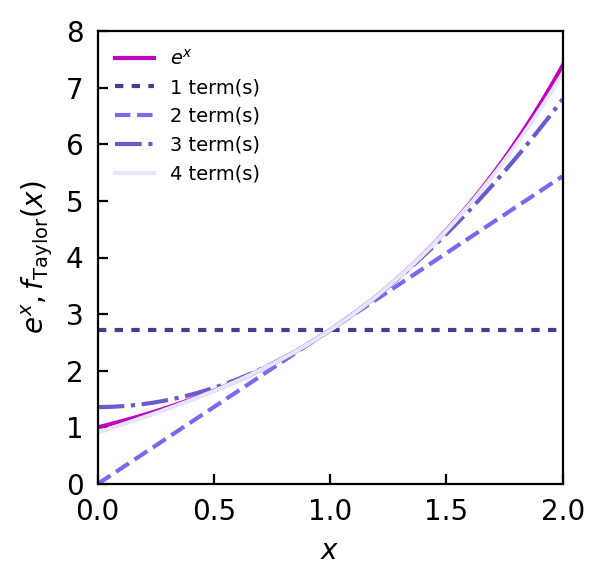

In [47]:
from codes.plotting import taylor_exp_illustration, plot_prettier

plot_prettier()
taylor_exp_illustration(figsize=3.0)

***Note:*** near $x_0=1$ approximations of all orders except $0^{\rm th}$ order, $f_{\rm Taylor}(x_0=1)={\rm const}= e$, look very similar. So even "low order" schemes such as the linear scheme using only 0th and 1st orders can be quite accurate if expansion is used only close to $x_0$. 

In the case of orbit equations this means that time step $\Delta t = t_{n+1}-t_n$ should be sufficiently small so that truncation error $\epsilon$ is small. 

### <font color='darkblue'>Numerical scheme for equations of motion 
    
equations are written for $x$ component only and would be similar for $y$ and $z$ components, acceleration is computed using positions at $t=t_n$. : 

$$t_{n+1} = t_n + \Delta t$$ 

$$x_{n+1} = x_{n}+ v_{x,n}\Delta t,\ \ \ \ y_{n+1}=\ldots$$

$$v_{x,n+1} = v_{x,n}+a_{x,n}\Delta t,\ \ \ \ v_{y,n+1}=\ldots$$


***Note:*** This is the simplest scheme called the ***1st order forward Euler scheme***. 

### <font color='darkblue'>Numerical "integration" of the equations of motion
    
* Specify the problem by choosing initial positions and velocities of particles at the initial time $t_0$: $x_1(t_0)$, ..., $v_{x,1}(t_0)$,..., as well as their masses $m_1$ and $m_2$. 
    

* Choose time step $\Delta t$

    
* Repeatedly update coordinates and velocities for subsequent discrete time moments, $t_1=t_0+\Delta t$, $t_2=t_1+\Delta t$, $t_n = t_0 + n\Delta t$. 

***Note:*** $\Delta t$ does not have to be constant. In fact, often during orbit integration schemes are devised to make $\Delta t$ smaller or larger depending on the acceleration particles experience. Here we will consider constant time steps for simplicity, but we will come back to adaptive time stepping strategies when we will consider numerical integration of ordinary differential equations, of which orbit integration is a specific case, later in the course. 

### <font color='darkblue'>Physical units

To actually carry out calculations, we must choose physical units we will use. In physics the standard choice is SI units, while in astronomy the standard is [cgs](https://en.wikipedia.org/wiki/Centimetre%E2%80%93gram%E2%80%93second_system_of_units) units, which stands for **c**entimeters, **g**rams, **s**econds. 
    
We will use the latter (cgs). 

[Astronomical Unit (AU)](https://en.wikipedia.org/wiki/Astronomical_unit) is approximately equal to the distance between the Earth and the Sun.  

### <font color='darkblue'>Some relevant constants and quantities 

In [53]:
AU = 1.49598e+13 # 1 AU = average distance from the Earth to the Sun in centimeters (cm)
G = 6.67259e-08 # universal gravitational constant in cgs units 
yr =  3.15569e+07 # 1 year in seconds
msun = 1.9891e33 # mass of the Sun in grams
mearth = 5.9742e27 # mass of the Earth in grams
vcirc = (G*msun/AU)**0.5 # circular velocity = sqrt(G*Msun/AU)

### <font color='darkblue'> Initialize positions and velocities for a test: circular motion of the Earth around the Sun

In [75]:
x1, y1, z1 = 0., 0., 0. # coordinates of the Sun
x2, y2, z2 =  AU, 0., 0. # coordinates of the Earth 

vx1, vy1, vz1 = 0., 0., 0. # initial velocity of the Sun
vx2, vy2, vz2 = 0., vcirc, 0. # initial velocity of the Earth 

m1, m2 = msun, mearth # masses 



### <font color='darkblue'> Numerical integration

In [76]:
nsteps = 100000 # number of steps
dt =  10*yr / nsteps # time step

x, y, z = [], [], [] # lists to record positions of the Earth during time steps  

for n in range(nsteps):
    r12 = ((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)**0.5
    ax1 = G * m2 / r12**3 * (x2 - x1)
    ay1 = G * m2 / r12**3 * (y2 - y1)
    az1 = G * m2 / r12**3 * (z2 - z1)
    ax2 = G * m1 / r12**3 * (x1 - x2)
    ay2 = G * m1 / r12**3 * (y1 - y2)
    az2 = G * m1 / r12**3 * (z1 - z2)
    vx1 = vx1 + ax1 * dt 
    vy1 = vy1 + ay1 * dt 
    vz1 = vz1 + az1 * dt 
    vx2 = vx2 + ax2 * dt 
    vy2 = vy2 + ay2 * dt 
    vz2 = vz2 + az2 * dt 
    x1  = x1 + vx1 * dt 
    y1  = y1 + vy1 * dt 
    z1  = z1 + vz1 * dt 
    x2  = x2 + vx2 * dt 
    y2  = y2 + vy2 * dt 
    z2  = z2 + vz2 * dt 
    x.append(x2)
    y.append(y2)
    z.append(z2)
    
x, y, z = np.array(x)/AU, np.array(y)/AU, np.array(z)/AU

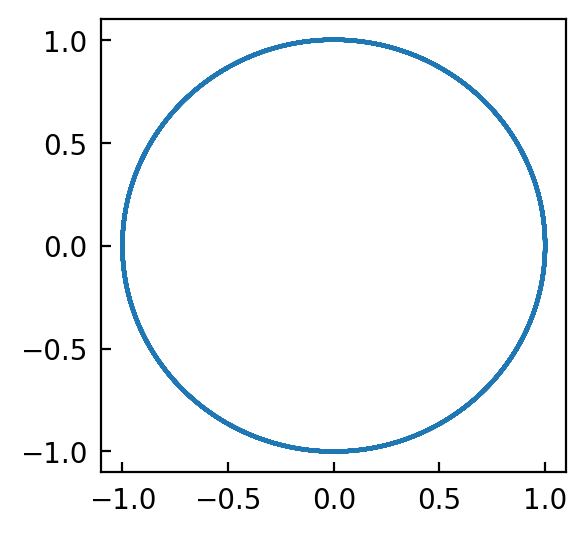

In [77]:
plt.figure(figsize=(3,3))
plt.plot(x,y)
plt.show()

### <font color='darkblue'>1st order Drift-Kick (DK) scheme
    
equations are written for $x$ component only and would be similar for $y$ and $z$ components, acceleration is computed using positions at $t=t_n$ and is used to update velocity to $t_{n+1}$ (**drift**). The new velocity is then used to update position to $t_{n+1}$ (**kick**). : 

    
**Drift:** 
    
$$x_{n+1} = x_{n}+ v_{x,n}\Delta t,\ \ \ \ y_{n+1}=\ldots$$

Compute acceleration using positions after drift (i.e. at $t_{n+1}$)
    
**Kick:** 
    
$$v_{x,n+1} = v_{x,n}+g_{x,n+1}\Delta t,\ \ \ \ v_{y,n+1}=\ldots$$




### <font color='darkblue'>1st order Kick-Drift (KD) scheme
    
equations are written for $x$ component only and would be similar for $y$ and $z$ components, acceleration is computed using positions at $t=t_n$. 
    
Compute acceleration using positions at $t_n$ and update velocity (**kick**). Then use the updated velocity to update positions (**drift**). 

**Kick:**
    
$$v_{x,n+1} = v_{x,n}+g_{x,n}\Delta t,\ \ \ \ v_{y,n+1}=\ldots$$

    
**Drift:**
    
$$x_{n+1} = x_{n}+ v_{x,n+1}\Delta t,\ \ \ \ y_{n+1}=\ldots$$



## By Thursday of this first week. 

* Accept an invitation link  to access <a href="https://a211s22.slack.com"><tt>a211s22.slack.com</tt></a> - the Slack workspace for this course - from the email you should have received from me.


* Install <a href="https://docs.google.com/document/d/1xb8UZj94aFtjDu8rQi0buEaPmn8mHnWdRvO2xKw0QCU/edit?usp=sharing">Miniconda or full Anaconda Python 3 distribution</a> on your laptop. 


* download the distributed Jupyter notebooks (this notebook and NumPy summary; see the google doc with the list of distributed materials in #class_info on Slack).  


* Make sure you can run notebooks on your laptop without errors.  


* Read the rest of this notebook about general case of $N$ particles. Think about how to arrange coordinates and velocities of particles into numpy arrays, and how to code up calculations of accelerations of particles using NumPy operations as much as possible.  


### <font color='darkblue'>2nd order Drift-Kick-Drift (DKD) scheme 

\begin{eqnarray}
&D:& \ \ \vec{x}_{n+1/2} = \vec{x}_{n}+v_{n}\,\frac{\Delta t}{2},\\
&K:& \ \ \vec{v}_{n+1}=\vec{v}_n + \vec{g}_{n+1/2}\, \Delta t, \\
&D:& \ \ \vec{x}_{n+3/2} = \vec{x}_{n+1/2}+v_{n+1}\,\Delta t,\nonumber\\
\end{eqnarray}


Still uses only one acceleration evaluation per step, but requires initialization of positions or velocities half a step behind or forward. 

**Note:** the scheme is called "2nd order" because its *truncation error* $\epsilon_{\rm trunc}$ decreases as $\Delta t^3$ with decreasing $\Delta t$, compared to $\Delta t^3$ for the first order schemes. 

The overall error after many integration steps decreases as $\Delta t^2$ with decreasing $\Delta t$ for the 2nd order schemes, and as $\Delta t$ for the 1st order schemes. 



### <font color='darkblue'>DKD scheme is also called interchangeable either "leapfrog" or Verlet scheme

<img width=300 src="https://www.particleincell.com/wp-content/uploads/2010/11/pic_leapfrog.png"></img>

In practice, this scheme is employed with positions and momenta kept at different time slices, half a step from each other. The velocities and positions "leap-frog" each other, hence the name of the scheme: *leapfrog* integration (this scheme is also known as *the Verlet scheme* in Physics and molecular dynamics areas). 


### <font color='darkblue'> Symplectic DKD scheme is the most accurate scheme that uses only one acceleration calculation per step
    


* More accurate schemes exist, but they require more calculations per step. 
    
    
* Step size control is also critical in some $N$-body integration problem, especially those that involve close encounters and strong gravitational interactions. Symplectic schemes for adaptive step sizes exist. 

### <font color='darkblue'>Integration of orbits of $N$ particles interacting gravitationally
    
    
Consider $N$ particles interacting gravitationally. We will label each particle with an index $i$ running from 0 to $N-1$. 
A particle with index $i$ has "Cartesian" coordinates $x_i$, $y_i$, $z_i$ and velocity components $v_{x,i}$, $v_{y,i}$, $v_{z,i}$. These are usually combined into *vectors* $\vec{r}_i=[x_i, y_i, z_i]$ and $\vec{v}_i=[v_{x,i}, v_{y,i}, v_{z,i}]$.
    
This particle is subject to gravitational forces from all other particles (except for itself): 
    
$$\frac{d\vec{r}_i}{dt} = \vec{v}_i;\ \ \ \ \frac{d\vec{v}_i}{dt}=\vec{g}_i\ \ \ i\in [0,N-1]$$

where $\vec{g}_i$ is vector of acceleration for a body at $\vec{r}_i$, which is determined by gravitational force from all the other bodies in the system:

$$\vec{g}_i=-G\sum\limits_{j=0,j\ne i}^{N-1} \frac{m_j}{r^3_{ij}}\,\vec{r}_{ij},$$
        
and where $\vec{r}_{ij}$ is the vector from location of body $i$ to body $j$ with magnitude given by the corresponding distance: 
    
$$r_{ij}=\left[(x_i-x_j)^2 + (y_i-y_j)^2 +(z_i-z_j)^2 \right]^{1/2}.$$
    

The same equations explicitly for each of the components are:
    
$$\frac{dx_i}{dt} = v_{x,i};\ \ \ \ \ \frac{dy_i}{dt} = v_{y,i};\ \ \ \ \  \frac{dz_i}{dt} = v_{z,i};$$

$$\frac{v_{x,i}}{dt}=g_{x,i}\ \ \ \ \frac{{v}_{y,i}}{dt}=g_{y,i}\ \ \ \ \frac{{v}_{z,i}}{dt}=g_{z,i}$$

$$g_{x,i}=-G\sum\limits_{j=0,j\ne i}^{N-1} \frac{m_j}{r^3_{ij}}\,(x_{i}-x_{j}),\rm \ \ldots,\rm$$

$$g_{y,i}=-G\sum\limits_{j=0,j\ne i}^{N-1} \frac{m_j}{r^3_{ij}}\,(y_{i}-y_{j}),\rm \ \ldots,\rm$$

$$g_{z,i}=-G\sum\limits_{j=0,j\ne i}^{N-1} \frac{m_j}{r^3_{ij}}\,(z_{i}-z_{j}),\rm \ \ldots,\rm$$


### <font color='darkblue'> Dimensionless equations for numerical $N$-body integration: code units
    
#### for graduate students, optional for undergraduate students

When we model physical systems on a computer it is convenient to rescale the physical units to the values natural for a given problem. For example, when we consider a planet orbiting around the Sun, the mass of the Sun is a natural unit, as is the mass of this planet. Such rescaling is our best bet that the values involved in numerical calculations are not too large or not too small.

Usually, equations for numerical calculations are written using *dimensionless* quantities - i.e. physical quantities, normalized by a characteristic value. For example, dimensionaless coordinates: $\tilde{x}=x/r_0$, $\tilde{y}=y/r_0$, $\tilde{z}=z/r_0$.

Equations that are governing physical system are recast for dimensionless code variables, by substituting expressions for physical quantities in terms of dimensionless ones. 

#### <font color='darkblue'> Code units
    
For example, the magnitude of acceleration for a body $i$ due to gravitational force from another body $j$ is

$$
g_i = G\,\frac{m_j}{r_{ij}^2}
$$


For code units, we can choose some suitable units of time, mass, and scale: $t_0$, $m_0$, $r_0$  (see above for reasonable choices for different systems). We do this by substituting $m_j=m_0\tilde{m}_j$, $r_{ij}=r_0\tilde{r}_{ij}$, and $g_i=g_0\tilde{g}_i$, where e.g. $g_0=r_0/t_0^2$, into the equation above, which gives:

$$
\tilde{g}_i\,\frac{r_0}{t_0^2} = G\,\frac{\tilde{m}_j m_0}{\tilde{r}_{ij}^2r_0^2}\ \ \rightarrow \  \ 
\tilde{g}_i = G\,\frac{t_0^2m_0}{r_0^3}\,\frac{\tilde{m}_j}{\tilde{r}_{ij}^2}\equiv \tilde{G}\,\frac{\tilde{m}_j}{\tilde{r}_{ij}^2}.
$$

where $\tilde{G} = G/G_0$, and $G_0 = r_0^3/(m_0t^2_0)$. 

an $N$-body code can be used to model motion of planets in a planetary system (characteristic mass $m_0\sim M_\odot$, scale $r_0\sim 1$ AU, and time $t_0\sim 1$ year), dynamics of stars in a star cluster ($m_0\sim 10^5 M_\odot$, scale $r_0\sim 1$ pc, and time $t_0\sim 1$  Myr), or motion of galaxies in galaxy cluster (characteristic mass $m_0\sim 10^{14}\ M_\odot$, scale $r_0\sim 1$  Mpc, and time $t_0\sim 10^9$ years). 

#### <font color='darkblue'> Code units with $\tilde{G}=1$
    
Alternatively, if we choose $r_0$ and $m_0$ as independent units, we can use the fact $\tilde{G} = G/G_0$, and $G_0 = r_0^3/(m_0t^2_0)$ to choose $t_0$:. 

\begin{equation}
t_0=\left(\frac{r_0^3}{G\,m_0}\right)^{1/2}
\end{equation}

which then gives

$$\tilde{G}=G\,\frac{m_0 t_0^2}{r_0^3}=1$$

and thus 


\begin{equation}
\tilde{g}_i = \frac{\tilde{m}_j}{\tilde{r}_{ij}^2}.
\end{equation}


#### <font color='darkblue'> Example of natural unit for integration of orbits of planetary systems

One natural choice of code units for integration of planetary systems is $\tilde{G}=1$, $r_0=1$ AU, $m_0=1\ M_\odot$ year, we have the unit of time 

\begin{equation}
t_0=\left(\frac{r_0^3}{Gm_0}\right)^{1/2}=\left(\frac{AU^3}{GM_\odot}\right)^{1/2}= \frac{1\ \mathrm{yr}}{2\pi}\left(1+\frac{M_{\oplus}}{M_\odot}\right)^{1/2},
\end{equation}

where $M_\oplus$ is the mass of the Earth: $M_\oplus/M_\odot=3.0034896149157645\times 10^{-6}$. 
    

The latter part follows from  the Kepler's law: $P^2=4\pi^2 R^3/[G(M+m)]$, where $P$ is the period of planet orbit in years, $R$ is the distance to the Sun in AU and $M$ is star mass in units of solar mass and $m$ is the mass of the orbiting body.
    